# 4.10 Final Project

## Step 1 - Setup and Import Data from 4.9

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# creating path variable
path = r'/Users/paigepearson/Desktop/Data Analytics/Immersion Course/Achievement 4/Instacart Basket Analysis'

In [3]:
# importing final data from 4.9
df_instacart = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'instacart_merged.pkl'))

## Step 2 - Address any PII data and security implications

Note: Will search for any potential PII data, then create a dataframe without PII data.

In [4]:
df_instacart.shape

(32404859, 34)

In [5]:
df_instacart.head(10)

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spent,spending_flag,median_orders,order_frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
5,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
8,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
9,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


In [6]:
df_instacart.describe()

,age,number_of_dependants,income,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_spent,median_orders
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.032876e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.239973e+07,3.240486e+07,3.240486e+07,3.240485e+07
mean,4.946527e+01,1.501896e+00,9.943773e+04,1.714230e+01,2.738867e+00,1.342515e+01,1.110408e+01,2.559866e+04,8.352547e+00,5.895873e-01,7.119612e+01,9.919792e+00,7.790994e+00,3.305217e+01,1.198023e+01,1.039776e+01
std,1.848558e+01,1.118865e+00,4.305727e+04,1.753532e+01,2.090077e+00,4.246380e+00,8.779064e+00,1.408400e+04,7.127071e+00,4.919087e-01,3.821139e+01,6.281485e+00,4.241809e+00,2.515525e+01,8.324227e+01,7.131754e+00
min,1.800000e+01,0.000000e+00,2.590300e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.300000e+01,1.000000e+00,6.700400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.387298e+00,6.000000e+00
50%,4.900000e+01,2.000000e+00,9.661800e+04,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.530200e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.824786e+00,8.000000e+00
75%,6.500000e+01,3.000000e+00,1.279120e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.254023e+00,1.300000e+01
max,8.100000e+01,3.000000e+00,5.939010e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.500542e+04,3.000000e+01


In [7]:
# dropping first name and last name columns, unsure if I should keep age, marital status. I will also drop the _merge column
df_insta = df_instacart.drop(columns = ['first_name', 'last_name', '_merge'])

In [8]:
# checking work
df_insta.head(10)

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,order_id,eval_set,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spent,spending_flag,median_orders,order_frequency_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,...,Mid-range,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,Mid-range,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,...,Mid-range,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,...,Mid-range,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,...,Mid-range,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
5,26711,Female,Missouri,48,1/1/2017,3,married,165665,2984525,prior,...,Mid-range,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
6,26711,Female,Missouri,48,1/1/2017,3,married,165665,2505178,prior,...,Mid-range,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
7,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,Mid-range,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
8,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,...,Mid-range,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
9,26711,Female,Missouri,48,1/1/2017,3,married,165665,518967,prior,...,Low-range,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


In [9]:
df_insta.dtypes

user_id                   object
gender                    object
state                     object
age                        int64
date_joined               object
number_of_dependants       int64
marital_status            object
income                     int64
order_id                  object
eval_set                  object
order_number               int64
order_day_of_week          int64
order_hour_of_day          int64
days_since_last_order    float64
product_id                 int64
add_to_cart_order          int64
reordered                  int64
product_name              object
aisle_id                   int64
department_id              int64
prices                   float64
price_range_loc           object
busiest_day               object
busiest_days              object
busiest_period_of_day     object
max_order                  int64
loyalty_flag              object
average_spent            float64
spending_flag             object
median_orders            float64
order_freq

Note: I am unsure if marital status, gender, and age would be considered PII data. I am leaving them in for now.

## Step 3 - Create a regional segmentation in the data, then examine spending habits by region.

Note: Regions are pre-determined. Link can be found in documentation in interim report.

In [10]:
# recording state counts to check region counts against later
df_insta['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [11]:
# creating an empty regions variable
regions = []

In [12]:
# creating region categories with a for loop
for value in df_insta['state']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        regions.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        regions.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        regions.append('South')
    else:
        regions.append('West')

In [13]:
# creating region column and imputing regions variable
df_insta['region'] = regions

In [14]:
# checking work
df_insta.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,order_id,eval_set,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spent,spending_flag,median_orders,order_frequency_flag,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,...,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest


In [15]:
df_insta['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [16]:
# creating crosstab to look at regional spending
region_spending_crosstab = pd.crosstab(df_insta['region'], df_insta['spending_flag'], dropna = False)

In [17]:
# checking work in excel
region_spending_crosstab.to_clipboard()

Observation: Each region has substantially larger numbers of customers categorized as low spenders. With some calculations via excel each region is made up of about 2% high spenders, and 98% low spenders.

## Step 4 - Create an exclusion flag for low-activity customers (fewer than 5 orders) and exclude them from the data. Export this sample.

In [17]:
# creating exclusion flag
df_insta.loc[df_insta['max_order'] < 5, 'activity_flag'] = 'Low activity'
df_insta.loc[df_insta['max_order'] >=5, 'activity_flag'] = 'Regular activity'

In [18]:
# creating new dataframe, excluding low-activity customers
df_insta_reg = df_insta[df_insta['activity_flag'] == 'Regular activity']

In [20]:
# exporting new dataframe
df_insta_reg.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'instacart_low_activity_excluded.pkl'))

## Step 5 - Create a profiling variable based on age, income, certain goods in the "department_id" column, and number of dependants.

In [19]:
# creating age flag
df_insta.loc[df_insta['age'] >= 65, 'age_flag'] = 'Senior'

In [20]:
df_insta.loc[(df_insta['age'] < 65) & (df_insta['age'] >= 40), 'age_flag'] = 'Middle Aged'

In [21]:
df_insta.loc[(df_insta['age'] < 40) & (df_insta['age'] >= 26), 'age_flag'] = 'Adult'

In [22]:
df_insta.loc[(df_insta['age'] < 26) & (df_insta['age'] >= 18), 'age_flag'] = 'Young Adult'

In [23]:
df_insta.loc[df_insta['age'] < 18, 'age_flag'] = 'Child'

In [24]:
# checking age flag
df_insta['age_flag'].value_counts(dropna = False)

Middle Aged    12665583
Senior          8575084
Adult           7119003
Young Adult     4045189
Name: age_flag, dtype: int64

In [25]:
# creating income flag
df_insta.loc[df_insta['income'] >= 150000, 'income_flag'] = 'High Income'
df_insta.loc[(df_insta['income'] < 150000) & (df_insta['income'] >= 50000), 'income_flag'] = 'Middle Income'
df_insta.loc[df_insta['income'] < 50000, 'income_flag'] = 'Low Lncome'

In [26]:
# checking work
df_insta['income_flag'].value_counts(dropna = False)

Middle Income    24759195
High Income       4051581
Low Lncome        3594083
Name: income_flag, dtype: int64

In [27]:
# creating kid flag
df_insta.loc[df_insta['number_of_dependants'] == 0, 'kid_flag'] = 'Childless'
df_insta.loc[df_insta['number_of_dependants'] != 0, 'kid_flag'] = 'Has Child'

In [28]:
# checking work
df_insta['kid_flag'].value_counts(dropna = False)

Has Child    24307356
Childless     8097503
Name: kid_flag, dtype: int64

## Step 6 - Create an appropriate visualization to show the distribution of profiles

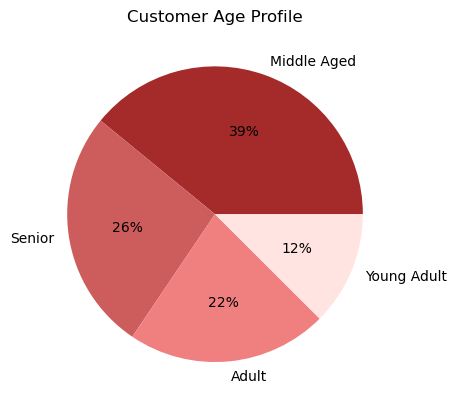

In [29]:
# creating pie chart about age of customers
pie_age = df_insta['age_flag'].value_counts().plot.pie(title = 'Customer Age Profile', label = '', colors = ['brown', 'indianred', 'lightcoral', 'mistyrose'], autopct = ('%1.f%%'))

In [31]:
# exporting pie chart
pie_age.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'customer_age_profile.png'))

Note: I have already made a visualization comparing the age and income of Instacart customers, see scatter_age_income.png in the Visualizations folder of this project.

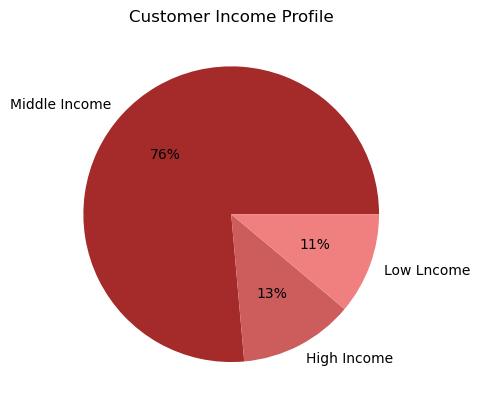

In [30]:
# creating pie chart of customer income
pie_income = df_insta['income_flag'].value_counts().plot.pie(title = 'Customer Income Profile', label = '', colors = ['brown', 'indianred', 'lightcoral', 'mistyrose'], autopct = ('%1.f%%'))

In [33]:
# exporting income pie chart
pie_income.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'customer_income_profile.png'))

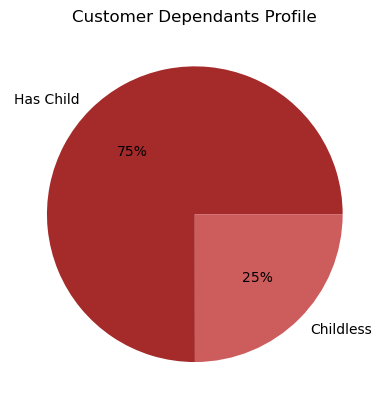

In [31]:
# creating dependants pie chart
pie_kids = df_insta['kid_flag'].value_counts().plot.pie(title = 'Customer Dependants Profile', label = '', colors = ['brown', 'indianred', 'lightcoral', 'mistyrose'], autopct = ('%1.f%%'))

In [35]:
# exporting dependants pie chart
pie_kids.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'customer_kids_profile.png'))

<Axes: xlabel='income', ylabel='number_of_dependants'>

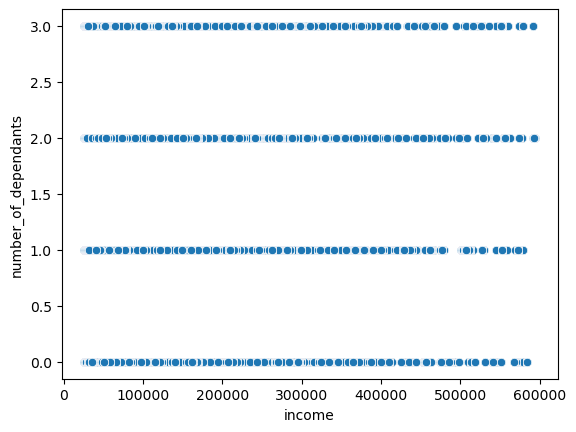

In [33]:
# creating scatterplot looking at income and number of dependants
sns.scatterplot(x = 'income', y = 'number_of_dependants',data = df_insta)

Observation: The scatterplot may not be the right type of visualization to show correlation, trying out a line chart next.


In [34]:
# creating a sample dataframe for the line chart, first step: create a list
np.random.seed(5)
dev = np.random.rand(len(df_insta)) <= 0.7

In [35]:
# create small subset and large subset with lists
df_small = df_insta[~dev]
df_large = df_insta[dev]

In [36]:
# checking work
len(df_large) + len(df_small)

32404859

In [37]:
df_insta.shape

(32404859, 36)

In [38]:
# creating selection for line chart
df_small_linechart = df_small[['income', 'number_of_dependants']]

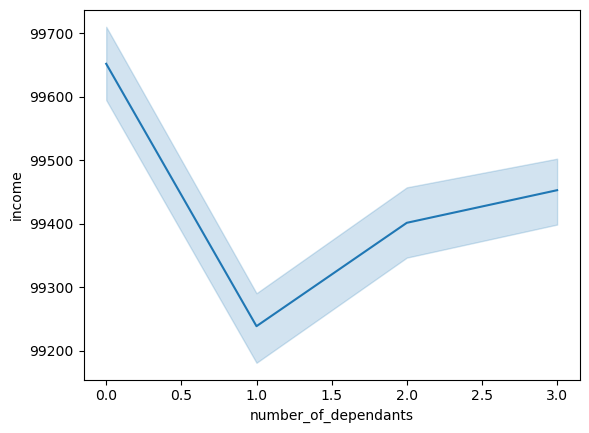

In [41]:
# creating line chart
line_inc_dep = sns.lineplot(data = df_small_linechart, x = 'number_of_dependants', y = 'income')

Observations: I expected those with 0 dependants to have a higher income, but the rise in income after 1 dependant is unexpected. I wish I could make a chart for the whole dataframe, but it would most certainly crash my computer.

In [43]:
# exporting line chart
line_inc_dep.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'income_and_dependants.png'))

Note: Line chart was not right for this either, will try other types in another section.